## Data Wrangling Home Prices by Zipcode
from Zillow public data

In [1]:
#Import pandas, matplotlib.pyplot, and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
#change directory to get data
path= '/Users/josephfrasca/Coding_Stuff/Springboard/Capstone_2/data/raw'
os.chdir(path)

In [3]:
os.listdir()

['.DS_Store',
 '.gitkeep',
 '.ipynb_checkpoints',
 'ACS_RentPrice_byZipcodes_productDownload_2020-10-22T230534',
 'fredgraph',
 'HousingUnits_byZipcode_ACS',
 'med_rent?.csv',
 'med_rent??.csv',
 'Median_Income_byZipcode_ACS',
 'Median_Rent_AND_HomePrice_byZipcode_ACS',
 'NationalfredgraphForZipcodes.csv',
 'Population_byZipcode_ACS',
 'Unemployment_byZipcode_ACS',
 'Vacancy_Rate_Natnl_2011-2019.csv',
 'VacanyRateData-ByZipcode',
 'Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv',
 'Zip_ZORI_AllHomesPlusMultifamily_SSA.csv']

### Data Loading

In [4]:
#load home price data
df_homes = pd.read_csv('Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')

In [5]:
df_homes

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,194499.0,...,1017161.0,1001805.0,981628.0,956932.0,946262.0,938152.0,935478.0,933945.0,934712.0,938408.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,209719.0,...,486137.0,485977.0,487138.0,488788.0,489947.0,490298.0,490907.0,492421.0,494773.0,497988.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,220104.0,...,1047657.0,1065121.0,1076998.0,1077073.0,1085711.0,1090631.0,1095708.0,1098853.0,1106245.0,1123239.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,203697.0,...,341746.0,341495.0,341715.0,342198.0,343290.0,344231.0,344812.0,345089.0,345863.0,346555.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,282776.0,...,633132.0,632775.0,633032.0,633716.0,633404.0,633244.0,633346.0,634618.0,636295.0,639390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30362,76721,34430,43523,Zip,OH,OH,Malinta,NaN,Henry County,59788.0,...,84560.0,84810.0,84821.0,84700.0,84762.0,84444.0,84278.0,84093.0,83923.0,83149.0
30363,60758,34430,7703,Zip,NJ,NJ,Eatontown,New York-Newark-Jersey City,Monmouth County,NaN,...,562614.0,565882.0,569174.0,572657.0,577028.0,580373.0,583376.0,585594.0,589446.0,595863.0
30364,78801,34430,47865,Zip,IN,IN,Carlisle,Terre Haute,Sullivan County,NaN,...,43732.0,43849.0,43868.0,43780.0,43586.0,43286.0,42857.0,42340.0,41629.0,40874.0
30365,58117,35187,822,Zip,LA,LA,Choudrant,Ruston,Lincoln Parish,NaN,...,194690.0,194985.0,196153.0,196851.0,196933.0,195992.0,195631.0,195314.0,195655.0,195484.0


## Data Definition - Home Prices

In [6]:
df_homes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30367 entries, 0 to 30366
Columns: 306 entries, RegionID to 2020-09-30
dtypes: float64(297), int64(3), object(6)
memory usage: 70.9+ MB


In [7]:
df_homes.isna().sum()/len(df_homes)*100

RegionID      0.0
SizeRank      0.0
RegionName    0.0
RegionType    0.0
StateName     0.0
             ... 
2020-05-31    0.0
2020-06-30    0.0
2020-07-31    0.0
2020-08-31    0.0
2020-09-30    0.0
Length: 306, dtype: float64

In [8]:
df_homes.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,194499.0,...,1017161.0,1001805.0,981628.0,956932.0,946262.0,938152.0,935478.0,933945.0,934712.0,938408.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,209719.0,...,486137.0,485977.0,487138.0,488788.0,489947.0,490298.0,490907.0,492421.0,494773.0,497988.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,220104.0,...,1047657.0,1065121.0,1076998.0,1077073.0,1085711.0,1090631.0,1095708.0,1098853.0,1106245.0,1123239.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,203697.0,...,341746.0,341495.0,341715.0,342198.0,343290.0,344231.0,344812.0,345089.0,345863.0,346555.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,282776.0,...,633132.0,632775.0,633032.0,633716.0,633404.0,633244.0,633346.0,634618.0,636295.0,639390.0


### Data Cleaning - Home Prices

In [9]:
#isolate annual DataFrames from 2011-2018
df_homes_2011 = df_homes.iloc[:, np.r_[0:9,189:201]]
df_homes_2012 = df_homes.iloc[:, np.r_[0:9,201:213]]
df_homes_2013 = df_homes.iloc[:, np.r_[0:9,213:225]]
df_homes_2014 = df_homes.iloc[:, np.r_[0:9,225:237]]
df_homes_2015 = df_homes.iloc[:, np.r_[0:9,237:249]]
df_homes_2016 = df_homes.iloc[:, np.r_[0:9,249:261]]
df_homes_2017 = df_homes.iloc[:, np.r_[0:9,261:273]]
df_homes_2018 = df_homes.iloc[:, np.r_[0:9,273:285]]
df_homes_2019 = df_homes.iloc[:, np.r_[0:9,285:297]]
df_homes_2020 = df_homes.iloc[:, np.r_[0:9,297:306]]

In [10]:
df_homes_2020.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1001805.0,981628.0,956932.0,946262.0,938152.0,935478.0,933945.0,934712.0,938408.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,485977.0,487138.0,488788.0,489947.0,490298.0,490907.0,492421.0,494773.0,497988.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1065121.0,1076998.0,1077073.0,1085711.0,1090631.0,1095708.0,1098853.0,1106245.0,1123239.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,341495.0,341715.0,342198.0,343290.0,344231.0,344812.0,345089.0,345863.0,346555.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,632775.0,633032.0,633716.0,633404.0,633244.0,633346.0,634618.0,636295.0,639390.0


In [11]:
#check NaNs
df_homes_2011.isna().sum()/len(df_homes_2011)*100

RegionID       0.000000
SizeRank       0.000000
RegionName     0.000000
RegionType     0.000000
StateName      0.000000
State          0.000000
City           0.000000
Metro         23.439918
CountyName     0.000000
2011-01-31    11.084401
2011-02-28    10.959265
2011-03-31    10.781440
2011-04-30    10.662891
2011-05-31    10.623374
2011-06-30    10.547634
2011-07-31    10.448842
2011-08-31    10.346758
2011-09-30    10.247967
2011-10-31    10.162347
2011-11-30    10.096486
2011-12-31    10.030625
dtype: float64

In [12]:
#list of when Metro column = NaN
metro_nan = df_homes_2011[df_homes_2011['Metro'].isna() == True]
metro_nan.nunique()

RegionID      7118
SizeRank      2600
RegionName    7118
RegionType       1
StateName       45
State           45
City          5145
Metro            0
CountyName     796
2011-01-31    5392
2011-02-28    5393
2011-03-31    5445
2011-04-30    5433
2011-05-31    5460
2011-06-30    5455
2011-07-31    5463
2011-08-31    5498
2011-09-30    5511
2011-10-31    5511
2011-11-30    5528
2011-12-31    5520
dtype: int64

In [13]:
metro_nan

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2011-01-31,...,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31
2716,70178,2742,28734,Zip,NC,NC,Franklin,NaN,Macon County,153793.0,...,152528.0,151777.0,151037.0,150402.0,149818.0,149429.0,149201.0,148828.0,148115.0,147158.0
3035,91865,3066,77351,Zip,TX,TX,West Livingston,NaN,Polk County,94710.0,...,95436.0,95633.0,95172.0,94580.0,94137.0,94022.0,94023.0,93766.0,94038.0,94147.0
3822,75303,3865,39452,Zip,MS,MS,Lucedale,NaN,George County,102934.0,...,102245.0,101849.0,101628.0,101491.0,101543.0,101676.0,101686.0,101542.0,101630.0,101700.0
4293,74894,4344,38583,Zip,TN,TN,Sparta,NaN,White County,89243.0,...,88609.0,88289.0,88112.0,88092.0,88100.0,88104.0,88154.0,88216.0,88241.0,88181.0
4297,71180,4348,30533,Zip,GA,GA,Dahlonega,NaN,Lumpkin County,141668.0,...,139465.0,137939.0,136531.0,135736.0,135160.0,134607.0,134005.0,133173.0,132698.0,132144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30349,72032,34430,32511,Zip,MO,MO,Macon,NaN,Macon County,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30352,91903,34430,77399,Zip,TX,TX,Corrigan,NaN,Polk County,66909.0,...,67047.0,67081.0,66900.0,66796.0,66885.0,67108.0,66939.0,66834.0,67367.0,68383.0
30356,58084,34430,742,Zip,CO,CO,Ceiba,NaN,Gunnison County,294530.0,...,298415.0,298529.0,301292.0,299328.0,299799.0,297791.0,296561.0,298728.0,300339.0,301188.0
30361,61693,34430,10117,Zip,OH,OH,Piketon,NaN,Pike County,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#create new column for aver home price for the year/zipcode
df_homes_2011['HomePrice'] = round(df_homes_2011.iloc[:,8: ].mean(axis=1), 2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
df_homes_2011.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2011-01-31,...,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,HomePrice
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,780114.0,...,785722.0,783425.0,782055.0,783642.0,784601.0,785216.0,783347.0,784810.0,785198.0,784477.42
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,406419.0,...,402508.0,401686.0,399042.0,401282.0,399902.0,400388.0,395881.0,396477.0,393375.0,400695.83
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,799250.0,...,819204.0,819243.0,820139.0,818610.0,821545.0,823646.0,829552.0,834686.0,839187.0,821072.58
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,268778.0,...,265330.0,264122.0,263844.0,263843.0,263659.0,264226.0,264723.0,265688.0,265795.0,265425.17
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,514290.0,...,508617.0,508506.0,505419.0,508759.0,507645.0,509103.0,503178.0,503588.0,499874.0,507804.42


In [16]:
#drop monthly data
raw = df_homes_2011.iloc[:, 9:21]
df_homes_2011.drop(raw, axis=1, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
df_homes_2011.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,HomePrice
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,784477.42
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,400695.83
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,821072.58
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,265425.17
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,507804.42


In [18]:
#repeat for other DataFrames 2012-2018
#create new column for aver home price for the year/zipcode
df_homes_2012['HomePrice'] = round(df_homes_2012.iloc[:,8: ].mean(axis=1), 2)
df_homes_2013['HomePrice'] = round(df_homes_2013.iloc[:,8: ].mean(axis=1), 2)
df_homes_2014['HomePrice'] = round(df_homes_2014.iloc[:,8: ].mean(axis=1), 2)
df_homes_2015['HomePrice'] = round(df_homes_2015.iloc[:,8: ].mean(axis=1), 2)
df_homes_2016['HomePrice'] = round(df_homes_2016.iloc[:,8: ].mean(axis=1), 2)
df_homes_2017['HomePrice'] = round(df_homes_2017.iloc[:,8: ].mean(axis=1), 2)
df_homes_2018['HomePrice'] = round(df_homes_2018.iloc[:,8: ].mean(axis=1), 2)
df_homes_2019['HomePrice'] = round(df_homes_2019.iloc[:,8: ].mean(axis=1), 2)
df_homes_2020['HomePrice'] = round(df_homes_2020.iloc[:,8: ].mean(axis=1), 2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [19]:
#drop monthly data from other DataFrames
DFs = [df_homes_2012, df_homes_2013, df_homes_2014, df_homes_2015, df_homes_2016, df_homes_2017, df_homes_2018, df_homes_2019]

for DF in DFs:
    #drop monthly data
    months = DF.iloc[:, 9:21]
    DF.drop(months, axis=1, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
drop = df_homes_2020.iloc[:, 9:18]
df_homes_2020.drop(drop, axis=1, inplace=True)

### Data Joining

In [21]:
df_homes_2020.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,HomePrice
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,951924.67
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,490915.22
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1091064.33
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,343916.44
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,634424.44


In [22]:
df_homes_2019

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,HomePrice
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1072056.17
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,490717.08
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1053399.33
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,341633.50
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,639591.75
...,...,...,...,...,...,...,...,...,...,...
30362,76721,34430,43523,Zip,OH,OH,Malinta,NaN,Henry County,83879.67
30363,60758,34430,7703,Zip,NJ,NJ,Eatontown,New York-Newark-Jersey City,Monmouth County,545483.92
30364,78801,34430,47865,Zip,IN,IN,Carlisle,Terre Haute,Sullivan County,41754.92
30365,58117,35187,822,Zip,LA,LA,Choudrant,Ruston,Lincoln Parish,191554.75


In [23]:
#add Year column to each dataframe
df_homes_2011['Year'] = 2011

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
df_homes_2012['Year'] = 2012
df_homes_2013['Year'] = 2013
df_homes_2014['Year'] = 2014
df_homes_2015['Year'] = 2015
df_homes_2016['Year'] = 2016
df_homes_2017['Year'] = 2017
df_homes_2018['Year'] = 2018
df_homes_2019['Year'] = 2019
df_homes_2020['Year'] = 2020

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [25]:
df_homes_2019

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,HomePrice,Year
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1072056.17,2019
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,490717.08,2019
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1053399.33,2019
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,341633.50,2019
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,639591.75,2019
...,...,...,...,...,...,...,...,...,...,...,...
30362,76721,34430,43523,Zip,OH,OH,Malinta,NaN,Henry County,83879.67,2019
30363,60758,34430,7703,Zip,NJ,NJ,Eatontown,New York-Newark-Jersey City,Monmouth County,545483.92,2019
30364,78801,34430,47865,Zip,IN,IN,Carlisle,Terre Haute,Sullivan County,41754.92,2019
30365,58117,35187,822,Zip,LA,LA,Choudrant,Ruston,Lincoln Parish,191554.75,2019


In [26]:
#concat each year's dataframe into a single dataframe
df_homes_2011_2012 = pd.concat([df_homes_2011, df_homes_2012])
df_homes_2011_2013 = pd.concat([df_homes_2011_2012, df_homes_2013])
df_homes_2011_2014 = pd.concat([df_homes_2011_2013, df_homes_2014])
df_homes_2011_2015 = pd.concat([df_homes_2011_2014, df_homes_2015])
df_homes_2011_2016 = pd.concat([df_homes_2011_2015, df_homes_2016])
df_homes_2011_2017 = pd.concat([df_homes_2011_2016, df_homes_2017])
df_homes_2011_2018 = pd.concat([df_homes_2011_2017, df_homes_2018])
df_homes_2011_2019 = pd.concat([df_homes_2011_2018, df_homes_2019])
df_homes_2011_2020 = pd.concat([df_homes_2011_2019, df_homes_2020], ignore_index=True)
df_homes_2011_2020

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,HomePrice,Year
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,784477.42,2011
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,400695.83,2011
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,821072.58,2011
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,265425.17,2011
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,507804.42,2011
...,...,...,...,...,...,...,...,...,...,...,...
303665,76721,34430,43523,Zip,OH,OH,Malinta,NaN,Henry County,84331.11,2020
303666,60758,34430,7703,Zip,NJ,NJ,Eatontown,New York-Newark-Jersey City,Monmouth County,579932.56,2020
303667,78801,34430,47865,Zip,IN,IN,Carlisle,Terre Haute,Sullivan County,42896.56,2020
303668,58117,35187,822,Zip,LA,LA,Choudrant,Ruston,Lincoln Parish,195888.67,2020


In [27]:
df_homes_2011_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303670 entries, 0 to 303669
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   RegionID    303670 non-null  int64  
 1   SizeRank    303670 non-null  int64  
 2   RegionName  303670 non-null  int64  
 3   RegionType  303670 non-null  object 
 4   StateName   303670 non-null  object 
 5   State       303670 non-null  object 
 6   City        303670 non-null  object 
 7   Metro       232490 non-null  object 
 8   CountyName  303670 non-null  object 
 9   HomePrice   292604 non-null  float64
 10  Year        303670 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 25.5+ MB


In [28]:
df_homes_2011_2020.isna().sum()/len(df_homes_2011_2020)*100

RegionID       0.000000
SizeRank       0.000000
RegionName     0.000000
RegionType     0.000000
StateName      0.000000
State          0.000000
City           0.000000
Metro         23.439918
CountyName     0.000000
HomePrice      3.644087
Year           0.000000
dtype: float64

In [29]:
df_homes_2011_2020.nunique()

RegionID       30367
SizeRank       11070
RegionName     30367
RegionType         1
StateName         51
State             51
City           14847
Metro            861
CountyName      1759
HomePrice     282142
Year              10
dtype: int64

In [30]:
describe = df_homes_2011_2020.describe()

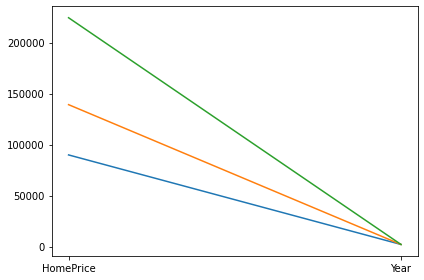

In [31]:
#plot 25, 50, 75 percentiles from 2011-2020
plt.plot(describe.iloc[4:7,3:].T)
plt.tight_layout()
plt.show()

In [32]:
df_homes_2011_2020.drop(['RegionType', 'StateName', 'RegionID'], axis=1, inplace=True)

In [34]:
df_homes_2011_2020[df_homes_2011_2020.RegionName == 30906]

,SizeRank,RegionName,State,City,Metro,CountyName,HomePrice,Year
468,473,30906,GA,Augusta,Augusta-Richmond County,Richmond County,NaN,2011
30835,473,30906,GA,Augusta,Augusta-Richmond County,Richmond County,NaN,2012
61202,473,30906,GA,Augusta,Augusta-Richmond County,Richmond County,NaN,2013
91569,473,30906,GA,Augusta,Augusta-Richmond County,Richmond County,NaN,2014
121936,473,30906,GA,Augusta,Augusta-Richmond County,Richmond County,NaN,2015
152303,473,30906,GA,Augusta,Augusta-Richmond County,Richmond County,NaN,2016
182670,473,30906,GA,Augusta,Augusta-Richmond County,Richmond County,63458.00,2017
213037,473,30906,GA,Augusta,Augusta-Richmond County,Richmond County,71968.42,2018
243404,473,30906,GA,Augusta,Augusta-Richmond County,Richmond County,79020.33,2019
273771,473,30906,GA,Augusta,Augusta-Richmond County,Richmond County,84938.22,2020


### Save Data

In [ ]:
df_homes_2011_2020.to_csv(r'/Users/josephfrasca/Coding_Stuff/Springboard/Capstone_2/data/interim/df_homePrices_2011_2020.csv', index=False)

### Notes

In [ ]:
#change RegionName to Zipcode
#replace NaNs with medians? (or drop the rows for ML) - see mentor notes to help decide strategy
#figure out metro NaNs??

### Summary